# LRRK2 p.A419V - Analysis in multiple GP2 ancestries 

- Project: Multiancestry LRRK2 p.A419V analysis
- Version: Python/3.10.12
- Created: 05-MAY-2025
- Last Update: 12-JUNE-2025

# Description

**1. Description**
- Association study
    - Undjusted
    - Selecting number of PCs
    - Adjusted by Sex and PCs
    - Adjusted by Sex, Age and PCs

# Getting started

## Load python libraries

In [7]:
# Import necessary packages
import os
import pandas as pd
import numpy as np
from io import StringIO
from firecloud import api as fapi
from IPython.core.display import display, HTML
import urllib.parse
from google.cloud import bigquery
import sys as sys

# Define function
# Utility routine for printing a shell command before executing it
def shell_do(command):
    print(f'Executing: {command}', file=sys.stderr)
    !$command
    
def shell_return(command):
    print(f'Executing: {command}', file=sys.stderr)
    output = !$command
    return '\n'.join(output)

def calculate_variant_freq(labels, variant, filename):
    results = []
    
    for label in labels:
        path = f"/home/jupyter/A419V_release9/{label}/{filename.replace('CAH', label)}"
        recode = pd.read_csv(path, delim_whitespace=True)

        # Separate cases and controls
        cases_data = recode[recode['PHENOTYPE'] == 2]
        controls_data = recode[recode['PHENOTYPE'] == 1]
        total_cases = cases_data.shape[0]
        total_controls = controls_data.shape[0]

        # Cases
        hom_cases = (cases_data[variant] == 2).sum()
        het_cases = (cases_data[variant] == 1).sum()
        hom_ref_cases = (cases_data[variant] == 0).sum()
        missing_cases = total_cases - (hom_cases + het_cases + hom_ref_cases)
        freq_cases = (2 * hom_cases + het_cases) / (2 * (total_cases - missing_cases)) if (total_cases - missing_cases) > 0 else None

        # Controls
        hom_controls = (controls_data[variant] == 2).sum()
        het_controls = (controls_data[variant] == 1).sum()
        hom_ref_controls = (controls_data[variant] == 0).sum()
        missing_controls = total_controls - (hom_controls + het_controls + hom_ref_controls)
        freq_controls = (2 * hom_controls + het_controls) / (2 * (total_controls - missing_controls)) if (total_controls - missing_controls) > 0 else None

        # Store result
        results.append({
            'Ancestry': label,
            'Variant': variant,
            'Hom Cases': hom_cases,
            'Het Cases': het_cases,
            'Hom Ref Cases': hom_ref_cases,
            'Missing Cases': missing_cases,
            'Total Cases': total_cases,
            'Carrier Freq in Cases': freq_cases,
            'Hom Controls': hom_controls,
            'Het Controls': het_controls,
            'Hom Ref Controls': hom_ref_controls,
            'Missing Controls': missing_controls,
            'Total Controls': total_controls,
            'Carrier Freq in Controls': freq_controls
        })

    return pd.DataFrame(results)

/tmp/ipykernel_90/4104619824.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Install R and its packages

In [ ]:
pip install rpy2

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("tidyverse")
install.packages("patchwork")
install.packages("data.table")
install.packages("qqman")

library(tidyverse)
library(patchwork)
library(data.table)
library(qqman)

* installing *source* package ‘tidyverse’ ...
** package ‘tidyverse’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tidyverse)
* installing *source* package ‘patchwork’ ...
** package ‘patchwork’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
*

gcc 9.4.0
zlib 1.2.11 is available ok
* checking if R installation supports OpenMP without any extra hints... yes
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c assign.c -o assign.o


** libs
using C compiler: ‘gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0’


gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c between.c -o between.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c bmerge.c -o bmerge.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c chmatch.c -o chmatch.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c cj.c -o cj.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fp

gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c transpose.c -o transpose.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c types.c -o types.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c uniqlist.c -o uniqlist.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-EpRONj/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c utils.c -o utils.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fo

installing to /home/jupyter/packages/00LOCK-data.table/00new/data.table/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (data.table)
* installing *source* package ‘qqman’ ...
** package ‘qqman’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
**

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/Rtmpmvhk2Z/downloaded_packages’
Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/patchwork_1.3.0.tar.gz'
Content type 'application/x-gzip' length 3324074 bytes (3.2 MB)
downloaded 3.2 MB


The downloaded source packages are in
	‘/tmp/Rtmpmvhk2Z/downloaded_packages’
Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/data.table_1.17.4.tar.gz'
Content type 'application/x-gzip' length 5839682 bytes (5.6 MB)
downloaded 5.6 MB


The downloaded source packages are in
	‘/tmp/Rtmpmvhk2Z/downloaded_packages’
Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is u

# Association study for A419V

Note: A419V is not present in African ancestry

## Unadjusted

In [ ]:
%%bash
WORK_DIR=/home/jupyter/A419V_release9
cd $WORK_DIR

lables=('AAC' 'AFR' 'AJ' 'AMR' 'CAH' 'CAS' 'EAS' 'EUR' 'MDE' 'SAS')

for label in "${lables[@]}"
do
    /home/jupyter/plink2 \
    --bfile ${label}/${label}_release9_remove_related_a419v \
    --glm allow-no-covars cols=+a1freq,+a1freqcc,+a1count,+totallele,+a1countcc,+totallelecc,+err,+gcountcc \
    --ci 0.95 \
    --freq \
    --out ${label}/${label}_release9_remove_related_a419v
done

In [5]:
lables = ['AAC', 'AJ', 'AMR', 'CAH', 'CAS', 'EAS', 'EUR', 'MDE', 'SAS']

df_results = pd.DataFrame()
for label in lables:
    
    glm = pd.read_csv(f"/home/jupyter/A419V_release9/{label}/{label}_release9_remove_related_a419v.PHENO1.glm.logistic.hybrid", sep = "\t")
    glm = glm[["#CHROM", "POS", "ID", "REF", "ALT", "A1_FREQ", "CASE_NON_A1_CT", "CASE_HET_A1_CT", "CASE_HOM_A1_CT", "CTRL_NON_A1_CT", "CTRL_HET_A1_CT", "CTRL_HOM_A1_CT", "OR", "L95", "U95", "P"]]
    glm['label'] = f"{label}"
    df_results = pd.concat([df_results, glm], axis=0, ignore_index=True)

df_results

,#CHROM,POS,ID,REF,ALT,A1_FREQ,CASE_NON_A1_CT,CASE_HET_A1_CT,CASE_HOM_A1_CT,CTRL_NON_A1_CT,CTRL_HET_A1_CT,CTRL_HOM_A1_CT,OR,L95,U95,P,label
0,12,40252984,Seq_rs34594498,G,A,0.000000,338,0,0,824,0,0,NaN,NaN,NaN,NaN,AAC
1,12,40252984,exm994472,G,A,0.000000,338,0,0,827,0,0,NaN,NaN,NaN,NaN,AAC
2,12,40252984,Seq_rs34594498,G,A,0.000198,1705,1,0,824,0,0,1.45031,0.059018,35.63980,0.819966,AJ
3,12,40252984,exm994472,G,A,0.000197,1707,1,0,824,0,0,1.44861,0.058949,35.59800,0.820524,AJ
4,12,40252984,Seq_rs34594498,G,A,0.000000,2005,0,0,1428,0,0,NaN,NaN,NaN,NaN,AMR
5,12,40252984,exm994472,G,A,0.000000,2004,0,0,1428,0,0,NaN,NaN,NaN,NaN,AMR
6,12,40252984,Seq_rs34594498,G,A,0.006821,630,13,0,310,0,0,13.29660,0.787862,224.40400,0.072718,CAH
7,12,40252984,exm994472,G,A,0.007338,630,14,0,310,0,0,14.28150,0.849168,240.19000,0.064830,CAH
8,12,40252984,Seq_rs34594498,G,A,0.008595,648,13,0,324,4,0,1.62500,0.525686,5.02320,0.399128,CAS
9,12,40252984,exm994472,G,A,0.008595,647,13,0,325,4,0,1.63253,0.528130,5.04643,0.394645,CAS


Only CAH, CAS, EAS, EUR and FIN carry this variant

#### Adding info to GLM

In [ ]:
%%bash
WORK_DIR=/home/jupyter/A419V_release9
cd $WORK_DIR

lables=('AJ' 'CAH' 'CAS' 'EAS' 'EUR')

for label in "${lables[@]}"
do
    /home/jupyter/plink1.9 \
    --bfile ${label}/${label}_release9_remove_related_a419v \
    --recode A \
    --out ${label}/${label}_release9_remove_related_a419v
done

In [9]:
labels = ['CAH', 'EAS', 'EUR']
variant = "exm994472_A"
filename = "CAH_release9_remove_related_a419v.raw"

df_results = calculate_variant_freq(labels, variant, filename)
df_results

,Ancestry,Variant,Hom Cases,Het Cases,Hom Ref Cases,Missing Cases,Total Cases,Carrier Freq in Cases,Hom Controls,Het Controls,Hom Ref Controls,Missing Controls,Total Controls,Carrier Freq in Controls
0,CAH,exm994472_A,0,14,630,0,644,0.010870,0,0,310,0,310,0.000000
1,EAS,exm994472_A,1,80,3109,2,3192,0.012853,1,14,2355,9,2379,0.003376
2,EUR,exm994472_A,2,31,15288,11,15332,0.001142,0,2,5485,5,5492,0.000182


In [10]:
labels = ['AJ', 'CAS']
variant = "Seq_rs34594498_A"
filename = "CAH_release9_remove_related_a419v.raw"

df_results = calculate_variant_freq(labels, variant, filename)
df_results

,Ancestry,Variant,Hom Cases,Het Cases,Hom Ref Cases,Missing Cases,Total Cases,Carrier Freq in Cases,Hom Controls,Het Controls,Hom Ref Controls,Missing Controls,Total Controls,Carrier Freq in Controls
0,AJ,Seq_rs34594498_A,0,1,1705,3,1709,0.000293,0,0,824,0,824,0.000000
1,CAS,Seq_rs34594498_A,0,13,648,0,661,0.009834,0,4,324,1,329,0.006098


# Adjusted

## Scree plot (Select number of PCs to be adjusted)

In [11]:
%%R

# View the eigenvalues of all ancestry

labels <- c("EAS", "EUR", "CAH", "CAS", "AJ")
df     <- data.frame(
          PC = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10")
          )

for (label in labels) {
    
    eigenval <- read.delim(paste0("/home/jupyter/A419V_release9/", label, "/", label, "_release9.eigenval"), sep='\t',header=F, stringsAsFactor=F)
    
    # Give Column names for each PC values
    colnames(eigenval) <- paste0(label, "_EigenValues")
    
    df <- cbind(df, eigenval)
    
}

df

     PC EAS_EigenValues EUR_EigenValues CAH_EigenValues CAS_EigenValues
1   PC1        47.67550        35.37680         6.73625         9.85811
2   PC2        23.52230        20.17330         6.07351         3.56929
3   PC3         7.68848        10.52410         2.24650         2.86350
4   PC4         6.14183         8.10255         2.18177         2.80899
5   PC5         3.73389         7.44380         2.08363         2.74229
6   PC6         3.65024         6.20231         1.96600         2.10596
7   PC7         3.51383         6.04210         1.86616         2.01352
8   PC8         3.02827         5.96634         1.66624         1.92638
9   PC9         2.67253         5.83702         1.65468         1.92059
10 PC10         2.63412         5.55470         1.63548         1.87349
   AJ_EigenValues
1         3.12194
2         3.03563
3         2.88004
4         2.64932
5         2.62093
6         2.60092
7         2.58362
8         2.57215
9         2.54798
10        2.51566


In [12]:
%%R

labels <- c("EAS", "EUR", "CAH", "CAS", "AJ")

df <- data.frame(
  PC = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10")
)

for (label in labels) {
    
    # Read eigenvalues
    eigenval <- read.delim(paste0("/home/jupyter/A419V_release9/", label, "/", label, "_release9.eigenval"), 
                           sep = '\t', header = FALSE, stringsAsFactors = FALSE)

    # Assign column name
    colnames(eigenval) <- label

    # Calculate percentage Variance Explained
    eigenval <- eigenval %>%
      mutate(Variance_Explained = (!!sym(label)) / sum(!!sym(label)) * 100)
    
    eigenval_red <- eigenval %>% select(Variance_Explained)
    
    colnames(eigenval_red) <- paste0(label, "_Variance_Explained")
    
    df <- cbind(df, eigenval_red)

}

df


     PC EAS_Variance_Explained EUR_Variance_Explained CAH_Variance_Explained
1   PC1              45.727074              31.807085              23.963704
2   PC2              22.560979              18.137702              21.606056
3   PC3               7.374263               9.462160               7.991755
4   PC4               5.890823               7.284958               7.761483
5   PC5               3.581292               6.692679               7.412357
6   PC6               3.501060               5.576462               6.993898
7   PC7               3.370225               5.432419               6.638724
8   PC8               2.904509               5.364303               5.927524
9   PC9               2.563308               5.248032               5.886400
10 PC10               2.526467               4.994200               5.818097
   CAS_Variance_Explained AJ_Variance_Explained
1               31.115689             11.508103
2               11.265944             11.189947
3        

In [13]:
%%R

# Define function to create scree plot

plot_scree <- function(label){
    eigenval                   <- read.delim(paste0("/home/jupyter/A419V_release9/", label, "/", label, "_release9.eigenval"), sep='\t',header=F, stringsAsFactor=F)
    colnames(eigenval)[1]      <- "Eigenvalue"
    eigenval$PC                <- as.numeric(rownames(eigenval))
    eigenval$VarianceExplained <- (eigenval$Eigenvalue/sum(eigenval$Eigenvalue))*100

    scree <- ggplot(data=eigenval, aes(x=PC, y=VarianceExplained)) +
                 geom_line() +
                 geom_point() +
                 theme_bw() +
                 theme(panel.grid.minor = element_blank()) +
                 scale_x_continuous(name="Principle Components", breaks=seq(0, 10, 1), limits=c(NA,10)) +
                 scale_y_continuous(name="Percentage (%) Variance Explained", breaks=seq(0, 100, 5)) +
                 ggtitle(paste0("Scree plot: ", label)) +
                 theme(plot.title=element_text(hjust=0.5, face='bold'))
    
    print(scree) 
}

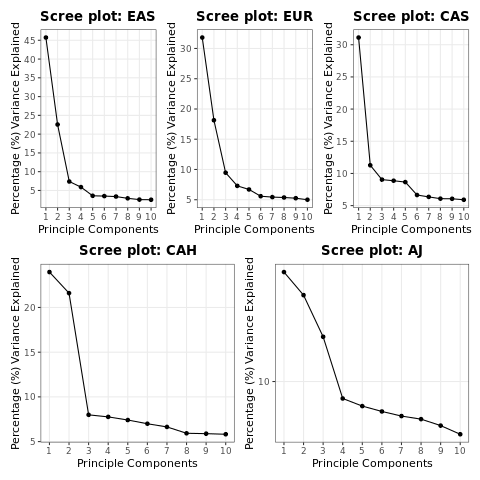

In [17]:
%%R

# Checking the plot for ancestries with carier
scree_eas <- plot_scree("EAS")
scree_eur <- plot_scree("EUR")
scree_cas <- plot_scree("CAS")
scree_cah <- plot_scree("CAH")
scree_aj  <- plot_scree("AJ")

(scree_eas | scree_eur |scree_cas) / (scree_cah |scree_aj)

## Adjusted

### By Sex and PCs

In [20]:
%%bash
WORK_DIR=/home/jupyter/A419V_release9
cd $WORK_DIR

run_glm() {

    local ancestry="$1"  # First argument: ancestry label
    local num_pcs="$2"   # Second argument: number of PCs to adjust

    BASE_DIR="/home/jupyter/A419V_release9"
    PHENO_FILE="${BASE_DIR}/${ancestry}/${ancestry}_covar.txt"
    OUT_FILE="${BASE_DIR}/${ancestry}/${ancestry}_a419v_adjusted"

    # Generate PC covariate names dynamically (e.g., PC1,PC2,...,PCn)
    PC_COVARS=$(seq -s, 1 "$num_pcs" | sed 's/[0-9]*/PC&/g')

    # Construct and run the PLINK2 command
    /home/jupyter/plink2 \
        --bfile ${BASE_DIR}/${ancestry}/${ancestry}_release9_remove_related_a419v \
        --glm no-x-sex firth-fallback cols=+a1freq,+a1freqcc,+a1count,+totallele,+a1countcc,+totallelecc,+err,+gcountcc \
        --pheno-name PHENO --covar-variance-standardize \
        --pheno "$PHENO_FILE" \
        --covar "$PHENO_FILE" \
        --covar-name SEX,"$PC_COVARS" \
        --ci 0.95 \
        --out "$OUT_FILE"
}


run_glm "CAS" 5
run_glm "EAS" 5
run_glm "EUR" 5

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/jupyter/A419V_release9/CAS/CAS_a419v_adjusted.log.
Options in effect:
  --bfile /home/jupyter/A419V_release9/CAS/CAS_release9_remove_related_a419v
  --ci 0.95
  --covar /home/jupyter/A419V_release9/CAS/CAS_covar.txt
  --covar-name SEX,PC1,PC2,PC3,PC4,PC5
  --covar-variance-standardize
  --glm no-x-sex firth-fallback cols=+a1freq,+a1freqcc,+a1count,+totallele,+a1countcc,+totallelecc,+err,+gcountcc
  --out /home/jupyter/A419V_release9/CAS/CAS_a419v_adjusted
  --pheno /home/jupyter/A419V_release9/CAS/CAS_covar.txt
  --pheno-name PHENO

Start time: Wed Jun 11 23:10:53 2025
52216 MiB RAM detected, ~50116 available; reserving 26108 MiB for main
workspace.
Using up to 8 compute threads.
1006 samples (545 females, 461 males; 1006 founders) loaded from
/home/jupyter/A419V_release9/CAS/CAS_release9_remove_related_a419v.fam.

In [21]:
lables = ['CAS', 'EAS', 'EUR']

df_results = pd.DataFrame()
for label in lables:
    
    glm = pd.read_csv(f"/home/jupyter/A419V_release9/{label}/{label}_a419v_adjusted.PHENO.glm.logistic.hybrid", sep = "\t")
    glm[["#CHROM", "POS", "ID", "REF", "ALT", "A1_FREQ", "CASE_NON_A1_CT", "CASE_HET_A1_CT", "CASE_HOM_A1_CT", "CTRL_NON_A1_CT", "CTRL_HET_A1_CT", "CTRL_HOM_A1_CT", "OR", "L95", "U95", "P"]]
    glm['label'] = f"{label}"
    df_results = pd.concat([df_results, glm], axis=0, ignore_index=True)

df_results[df_results["TEST"] == "ADD"]

,#CHROM,POS,ID,REF,ALT,PROVISIONAL_REF?,A1,OMITTED,A1_CT,ALLELE_CT,...,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P,ERRCODE,label
0,12,40252984,Seq_rs34594498,G,A,Y,A,G,17,1978,...,ADD,989,1.54152,0.583553,0.491164,4.83803,0.741605,0.458327,.,CAS
7,12,40252984,exm994472,G,A,Y,A,G,17,1978,...,ADD,989,1.54694,0.583551,0.492895,4.85506,0.747631,0.454683,.,CAS
14,12,40252984,Seq_rs34594498,G,A,Y,A,G,98,11124,...,ADD,5562,2.76916,0.279477,1.601240,4.78893,3.644470,0.000268,.,EAS
21,12,40252984,exm994472,G,A,Y,A,G,98,11120,...,ADD,5560,2.76121,0.279414,1.596840,4.77460,3.635000,0.000278,.,EAS
28,12,40252984,Seq_rs34594498,G,A,Y,A,G,36,41606,...,ADD,20803,5.32926,0.723528,1.290620,22.00570,2.312580,0.020746,.,EUR
35,12,40252984,exm994472,G,A,Y,A,G,37,41616,...,ADD,20808,5.40522,0.723124,1.310050,22.30160,2.333440,0.019625,.,EUR


##### By age, sex and PCs

In [22]:
%%bash
WORK_DIR=/home/jupyter/A419V_release9
cd $WORK_DIR

run_glm() {
    local ancestry="$1"  # First argument: ancestry label
    local num_pcs="$2"   # Second argument: number of PCs to adjust

    BASE_DIR="/home/jupyter/A419V_release9"
    PHENO_FILE="${BASE_DIR}/${ancestry}/${ancestry}_covar.txt"
    OUT_FILE="${BASE_DIR}/${ancestry}/${ancestry}_a419v_adjusted_withage"

    # Generate PC covariate names dynamically (e.g., PC1,PC2,...,PCn)
    PC_COVARS=$(seq -s, 1 "$num_pcs" | sed 's/[0-9]*/PC&/g')

    # Construct and run the PLINK2 command
    /home/jupyter/plink2 \
        --bfile ${BASE_DIR}/${ancestry}/${ancestry}_release9_remove_related_a419v \
        --glm no-x-sex firth-fallback cols=+a1freq,+a1freqcc,+a1count,+totallele,+a1countcc,+totallelecc,+err,+gcountcc \
        --pheno-name PHENO --covar-variance-standardize \
        --pheno "$PHENO_FILE" \
        --covar "$PHENO_FILE" \
        --covar-name SEX,AGE,"$PC_COVARS" \
        --ci 0.95 \
        --out "$OUT_FILE"
}

run_glm "CAH" 5
run_glm "CAS" 6
run_glm "EAS" 5
run_glm "EUR" 5

PLINK v2.0.0-a.6.9LM 64-bit Intel (29 Jan 2025)    cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/jupyter/A419V_release9/CAH/CAH_a419v_adjusted_withage.log.
Options in effect:
  --bfile /home/jupyter/A419V_release9/CAH/CAH_release9_remove_related_a419v
  --ci 0.95
  --covar /home/jupyter/A419V_release9/CAH/CAH_covar.txt
  --covar-name SEX,AGE,PC1,PC2,PC3,PC4,PC5
  --covar-variance-standardize
  --glm no-x-sex firth-fallback cols=+a1freq,+a1freqcc,+a1count,+totallele,+a1countcc,+totallelecc,+err,+gcountcc
  --out /home/jupyter/A419V_release9/CAH/CAH_a419v_adjusted_withage
  --pheno /home/jupyter/A419V_release9/CAH/CAH_covar.txt
  --pheno-name PHENO

Start time: Wed Jun 11 23:11:17 2025
52216 MiB RAM detected, ~50117 available; reserving 26108 MiB for main
workspace.
Using up to 8 compute threads.
982 samples (468 females, 514 males; 982 founders) loaded from
/home/jupyter/A419V_release9/CAH/CAH_release9_remove_

In [23]:
lables = ['CAS', 'EAS', 'EUR']

df_results = pd.DataFrame()
for label in lables:
    
    glm = pd.read_csv(f"/home/jupyter/A419V_release9/{label}/{label}_a419v_adjusted_withage.PHENO.glm.logistic.hybrid", sep = "\t")
    glm[["#CHROM", "POS", "ID", "REF", "ALT", "A1_FREQ", "CASE_NON_A1_CT", "CASE_HET_A1_CT", "CASE_HOM_A1_CT", "CTRL_NON_A1_CT", "CTRL_HET_A1_CT", "CTRL_HOM_A1_CT", "OR", "L95", "U95", "P"]]
    glm['label'] = f"{label}"
    df_results = pd.concat([df_results, glm], axis=0, ignore_index=True)

df_results[df_results["TEST"] == "ADD"]

,#CHROM,POS,ID,REF,ALT,PROVISIONAL_REF?,A1,OMITTED,A1_CT,ALLELE_CT,...,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P,ERRCODE,label
0,12,40252984,Seq_rs34594498,G,A,Y,A,G,17,1978,...,ADD,989,1.65067,0.589151,0.520205,5.23777,0.850685,0.394944,.,CAS
9,12,40252984,exm994472,G,A,Y,A,G,17,1978,...,ADD,989,1.65799,0.589306,0.522352,5.26259,0.857967,0.390911,.,CAS
18,12,40252984,Seq_rs34594498,G,A,Y,A,G,98,11124,...,ADD,5562,2.91981,0.286431,1.665490,5.11876,3.740920,0.000183,.,EAS
26,12,40252984,exm994472,G,A,Y,A,G,98,11120,...,ADD,5560,2.90830,0.286387,1.659080,5.09815,3.727710,0.000193,.,EAS
34,12,40252984,Seq_rs34594498,G,A,Y,A,G,36,41606,...,ADD,20803,5.66830,0.721668,1.377740,23.32050,2.404000,0.016217,.,EUR
42,12,40252984,exm994472,G,A,Y,A,G,37,41616,...,ADD,20808,5.75360,0.721426,1.399140,23.66020,2.425510,0.015287,.,EUR
